This part of code is written in order to train the model using the random forest algorithm
The goal behind this is to identify the most important features, eventually leading to the reduction of the dimensionality of the data. Which will be very helpful as SVM-trained models don't perform well with  heavy datasets.

In [20]:
import pandas as pd
import numpy as np
import joblib as jb
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score


Here we have the dataset ready for the training, we have already prepared it by removing null values, redundant rows, and transformed the categorical values in the 'Label' column to flag variables.

In [21]:
data=pd.read_csv('dt.csv')

Shuffling the dataset.
Splitting the data into training and testing sets.

In [22]:
data=data.sample(frac=1).reset_index(drop=True)
X = data.drop(' Label', axis=1)
y = data[' Label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Let's initiate our random forest

In [23]:
rf = RandomForestClassifier(max_depth=7)
rf.fit(X_train, y_train)


RandomForestClassifier(max_depth=7)

In [24]:
rfmodelfile="rf_model.joblib"
jb.dump(rf,rfmodelfile)

['rf_model.joblib']

In [25]:
rf=jb.load('rf_model.joblib')

now let's check the performance of our random forest on the training data

In [26]:
y_pred=rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
precision = precision_score(y_test, y_pred)
print("precision:", precision)

Accuracy: 0.9933823107856868
precision: 0.9988181531673496


Now we will check what are the most important features.

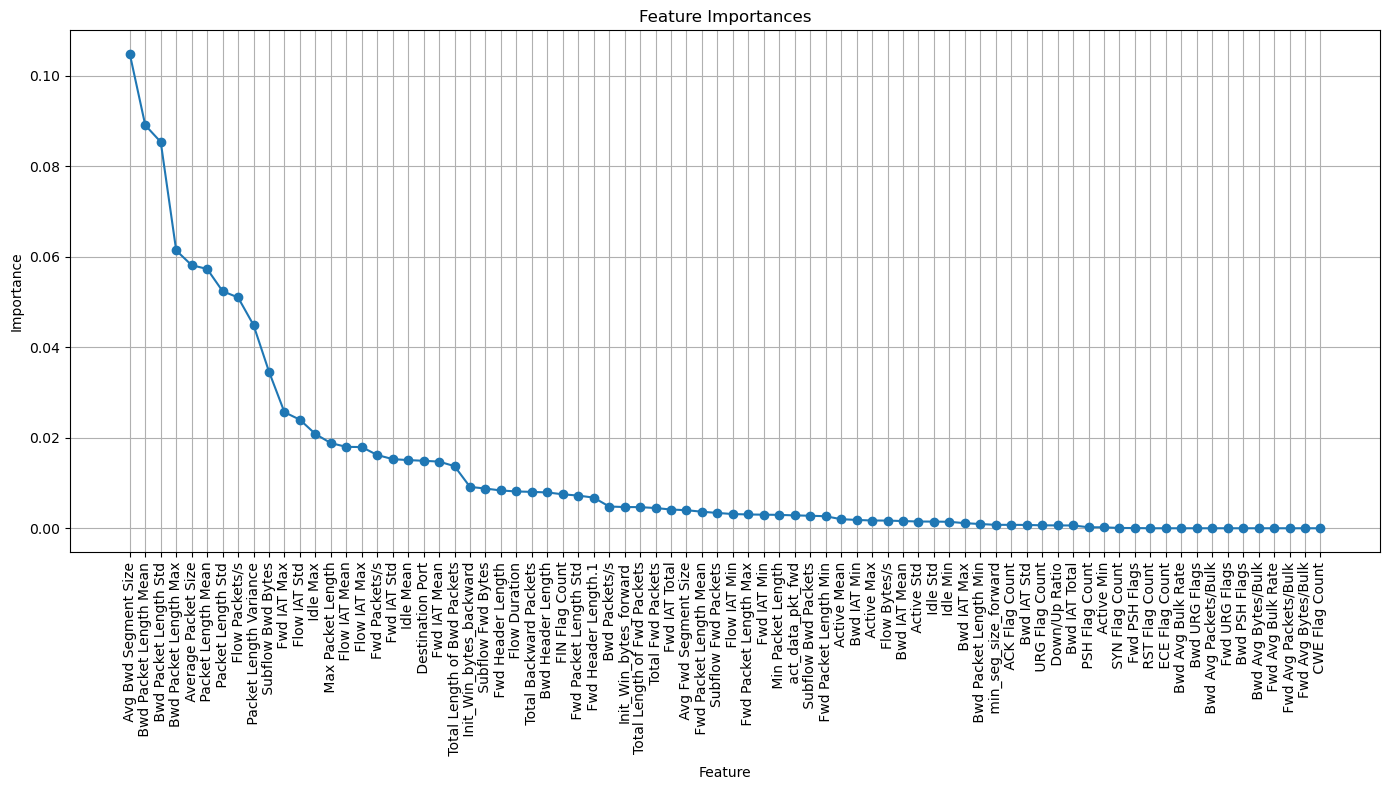

In [27]:
feature_importances = rf.feature_importances_
feature_importances_df = pd.DataFrame({'feature': X.columns, 'importance': feature_importances})
feature_importances_df = feature_importances_df.sort_values('importance', ascending=False)
plt.figure(figsize=(14, 8))
plt.plot(feature_importances_df['feature'], feature_importances_df['importance'], 'o-', markersize=6)
plt.title('Feature Importances')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.xticks(rotation=90)  
plt.tight_layout()  
plt.grid(True)
plt.show()

Now that we have a better idea on the importance of the features, we can proceed to try the model with less features now.
Filter features with importance >0

In [28]:
selected_features = feature_importances_df[feature_importances_df['importance'] > 0.005]['feature']
X_filtered = X[selected_features]
X_filtered.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 610481 entries, 0 to 610480
Data columns (total 31 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0    Avg Bwd Segment Size         610481 non-null  float64
 1    Bwd Packet Length Mean       610481 non-null  float64
 2    Bwd Packet Length Std        610481 non-null  float64
 3   Bwd Packet Length Max         610481 non-null  int64  
 4    Average Packet Size          610481 non-null  float64
 5    Packet Length Mean           610481 non-null  float64
 6    Packet Length Std            610481 non-null  float64
 7    Flow Packets/s               610481 non-null  float64
 8    Packet Length Variance       610481 non-null  float64
 9    Subflow Bwd Bytes            610481 non-null  int64  
 10   Fwd IAT Max                  610481 non-null  int64  
 11   Flow IAT Std                 610481 non-null  float64
 12   Idle Max                     610481 non-nul

Use random forest classifier on the new dataset

In [29]:
X_train2, X_test2, y_train, y_test = train_test_split(X_filtered, y, test_size=0.2, random_state=42)
rf = RandomForestClassifier(max_depth=7)
rf.fit(X_train2, y_train)

RandomForestClassifier(max_depth=7)

testing our model with less features.

In [30]:
y_pred2=rf.predict(X_test2)
accuracy2 = accuracy_score(y_test, y_pred2)
print("Accuracy:", accuracy2)
precision2 = precision_score(y_test, y_pred2)
print("precision:", precision2)

Accuracy: 0.9946845540840479
precision: 0.9971328033363743


Let's merge the training and testing sets together

In [31]:
X = pd.concat([X_train2, X_test2], ignore_index=True)
y = pd.concat([y_train, y_test], ignore_index=True)

And now the Label column back to the rest of the features.

In [32]:
Data=pd.concat([X,y], axis=1)
Data.info()
Data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 610481 entries, 0 to 610480
Data columns (total 32 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0    Avg Bwd Segment Size         610481 non-null  float64
 1    Bwd Packet Length Mean       610481 non-null  float64
 2    Bwd Packet Length Std        610481 non-null  float64
 3   Bwd Packet Length Max         610481 non-null  int64  
 4    Average Packet Size          610481 non-null  float64
 5    Packet Length Mean           610481 non-null  float64
 6    Packet Length Std            610481 non-null  float64
 7    Flow Packets/s               610481 non-null  float64
 8    Packet Length Variance       610481 non-null  float64
 9    Subflow Bwd Bytes            610481 non-null  int64  
 10   Fwd IAT Max                  610481 non-null  int64  
 11   Flow IAT Std                 610481 non-null  float64
 12   Idle Max                     610481 non-nul

,Avg Bwd Segment Size,Bwd Packet Length Mean,Bwd Packet Length Std,Bwd Packet Length Max,Average Packet Size,Packet Length Mean,Packet Length Std,Flow Packets/s,Packet Length Variance,Subflow Bwd Bytes,...,Init_Win_bytes_backward,Subflow Fwd Bytes,Fwd Header Length,Flow Duration,Total Backward Packets,Bwd Header Length,FIN Flag Count,Fwd Packet Length Std,Fwd Header Length.1,Label
0,1932.500,1932.500,1754.831473,4344,851.000000,794.266667,1425.366442,0.166522,2031669.495,11595,...,235,319,264,84073151,6,200,0,112.783532,264,1
1,661.000,661.000,1144.885584,1983,495.750000,396.600000,886.824560,20.344742,786457.800,1983,...,235,0,32,196611,3,96,0,0.000000,32,1
2,0.000,0.000,0.000000,0,0.000000,0.000000,0.000000,0.971563,0.000,0,...,11584,0,136,6175613,2,80,0,0.000000,136,0
3,1449.375,1449.375,2446.639966,7240,857.214286,800.066667,1875.638957,0.168481,3518021.495,11595,...,235,400,164,83095246,8,264,1,154.509115,164,1
4,0.000,0.000,0.000000,0,0.000000,0.000000,0.000000,737.191301,0.000,0,...,-1,0,64,2713,0,0,0,0.000000,64,1


Now let's save our result dataset to a csv file to which we'll apply SVM later on.

In [33]:
Data.to_csv('Data.csv', index=False)

In [40]:
SVC=jb.load('SVM_Model.joblib')

In [37]:
data=pd.read_csv('benin.csv')

In [42]:
dos1=pd.read_csv('yarbiykhdm3.csv')

In [45]:
dos2=pd.read_csv('yarbiykhdm2.csv')

In [43]:
selected_features = feature_importances_df[feature_importances_df['importance'] > 0.005]['feature']
dos1_filtered = dos1[selected_features]
dos1_filtered.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 31 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0    Avg Bwd Segment Size         67 non-null     float64
 1    Bwd Packet Length Mean       67 non-null     float64
 2    Bwd Packet Length Std        67 non-null     float64
 3   Bwd Packet Length Max         67 non-null     float64
 4    Average Packet Size          67 non-null     float64
 5    Packet Length Mean           67 non-null     float64
 6    Packet Length Std            67 non-null     float64
 7    Flow Packets/s               67 non-null     float64
 8    Packet Length Variance       67 non-null     float64
 9    Subflow Bwd Bytes            67 non-null     int64  
 10   Fwd IAT Max                  67 non-null     float64
 11   Flow IAT Std                 67 non-null     float64
 12   Idle Max                     67 non-null     int64  
 13   Max Pa

In [44]:
dos_pred=SVC.predict(dos1_filtered)
print(dos_pred)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1
 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [46]:
selected_features = feature_importances_df[feature_importances_df['importance'] > 0.005]['feature']
dos2_filtered = dos2[selected_features]
dos2_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20460 entries, 0 to 20459
Data columns (total 31 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0    Avg Bwd Segment Size         20460 non-null  float64
 1    Bwd Packet Length Mean       20460 non-null  float64
 2    Bwd Packet Length Std        20460 non-null  float64
 3   Bwd Packet Length Max         20460 non-null  float64
 4    Average Packet Size          20460 non-null  float64
 5    Packet Length Mean           20460 non-null  float64
 6    Packet Length Std            20460 non-null  float64
 7    Flow Packets/s               20460 non-null  float64
 8    Packet Length Variance       20460 non-null  float64
 9    Subflow Bwd Bytes            20460 non-null  int64  
 10   Fwd IAT Max                  20460 non-null  float64
 11   Flow IAT Std                 20460 non-null  float64
 12   Idle Max                     20460 non-null  int64  
 13   

In [47]:
dos2_pred=SVC.predict(dos2_filtered)
print(dos2_pred)

[1 1 1 ... 1 1 1]


In [48]:
resultdos2=np.ones(20460)
accuracy = accuracy_score(resultdos2, dos2_pred)
print("Accuracy:", accuracy)
precision = precision_score(resultdos2, dos2_pred)
print("precision:", precision)

Accuracy: 0.9787878787878788
precision: 1.0


In [49]:
ben=pd.read_csv('benign.csv')

In [50]:
selected_features = feature_importances_df[feature_importances_df['importance'] > 0.005]['feature']
ben_filtered = ben[selected_features]
ben_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 31 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0    Avg Bwd Segment Size         5 non-null      int64  
 1    Bwd Packet Length Mean       5 non-null      int64  
 2    Bwd Packet Length Std        5 non-null      float64
 3   Bwd Packet Length Max         5 non-null      int64  
 4    Average Packet Size          5 non-null      float64
 5    Packet Length Mean           5 non-null      float64
 6    Packet Length Std            5 non-null      float64
 7    Flow Packets/s               5 non-null      float64
 8    Packet Length Variance       5 non-null      float64
 9    Subflow Bwd Bytes            5 non-null      int64  
 10   Fwd IAT Max                  5 non-null      float64
 11   Flow IAT Std                 5 non-null      float64
 12   Idle Max                     5 non-null      int64  
 13   Max Pack

In [52]:
ben_pred=SVC.predict(ben_filtered)
print(ben_pred)

[0 0 0 0 0]
